<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 150.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 165.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 144.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 137.9 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [11]:
## Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [23]:
## Write your code here
for column in df.columns:
    # Check if column has missing values
    if df[column].isnull().sum() > 0:
        # For numerical columns
        if df[column].dtype in ['int64', 'float64']:
            # Replace with mean
            mid_value = df[column].median()
            df[column].fillna(mid_value, inplace=True)
        # For categorical columns
        else:
            # Replace with most frequent value
            most_frequent = df[column].value_counts().idxmax()
            df[column].fillna(most_frequent, inplace=True)

# Verify imputation
print(df.isnull().sum())

/tmp/ipykernel_299/3705073895.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(most_frequent, inplace=True)
/tmp/ipykernel_299/3705073895.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [24]:
## Write your code here
df[['Employment','JobSat','YearsCodePro']].value_counts()

Employment                              JobSat  YearsCodePro    
Employed, full-time                     7.0     2                   5195
Student, full-time                      7.0     2                   3535
Employed, full-time                     7.0     3                   1427
                                                5                   1292
                                                10                  1234
                                                                    ... 
                                        1.0     33                     1
                                                35                     1
                                                36                     1
Student, part-time;Employed, part-time  2.0     11                     1
                                                Less than 1 year       1
Name: count, Length: 2963, dtype: int64

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


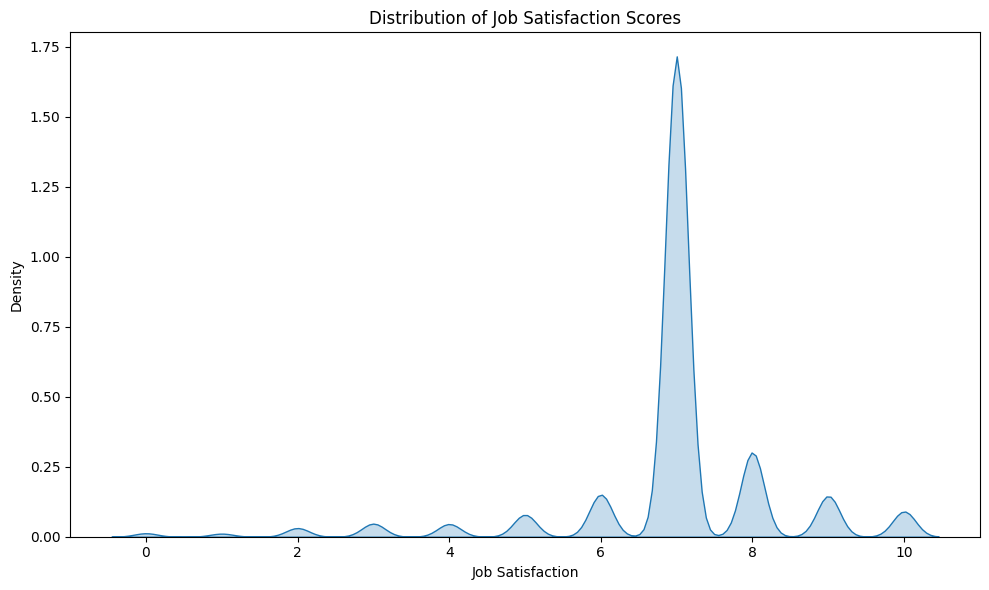

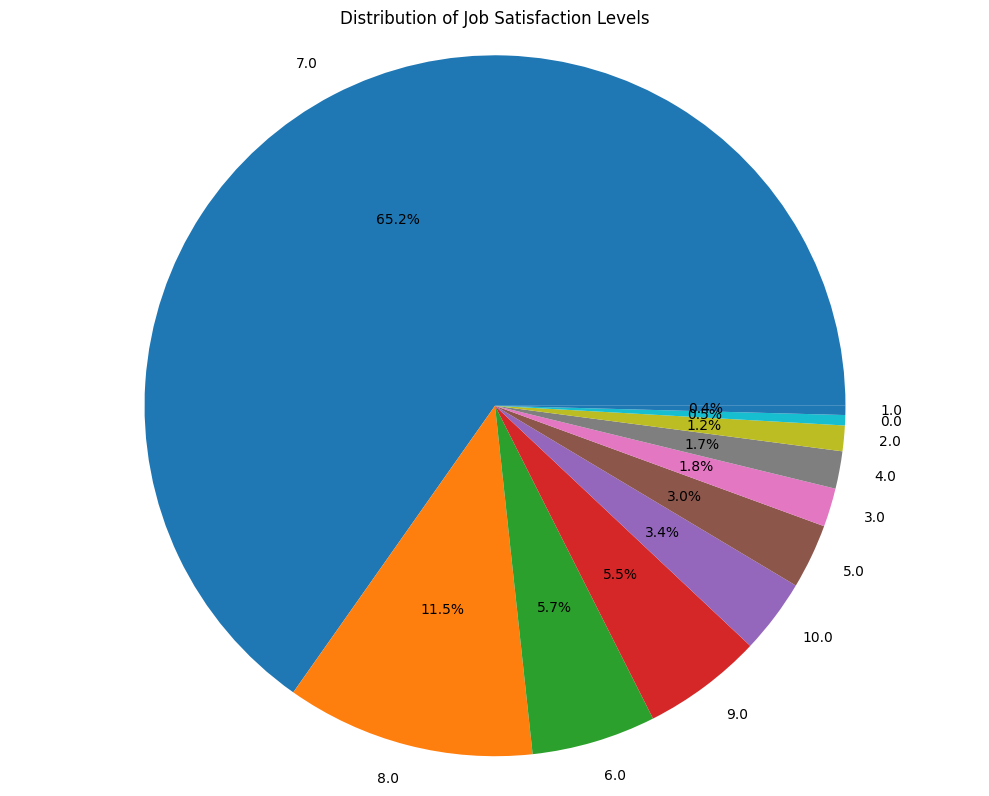

In [26]:
## Write your code here

# Create KDE plot for JobSat
plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], fill=True)
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


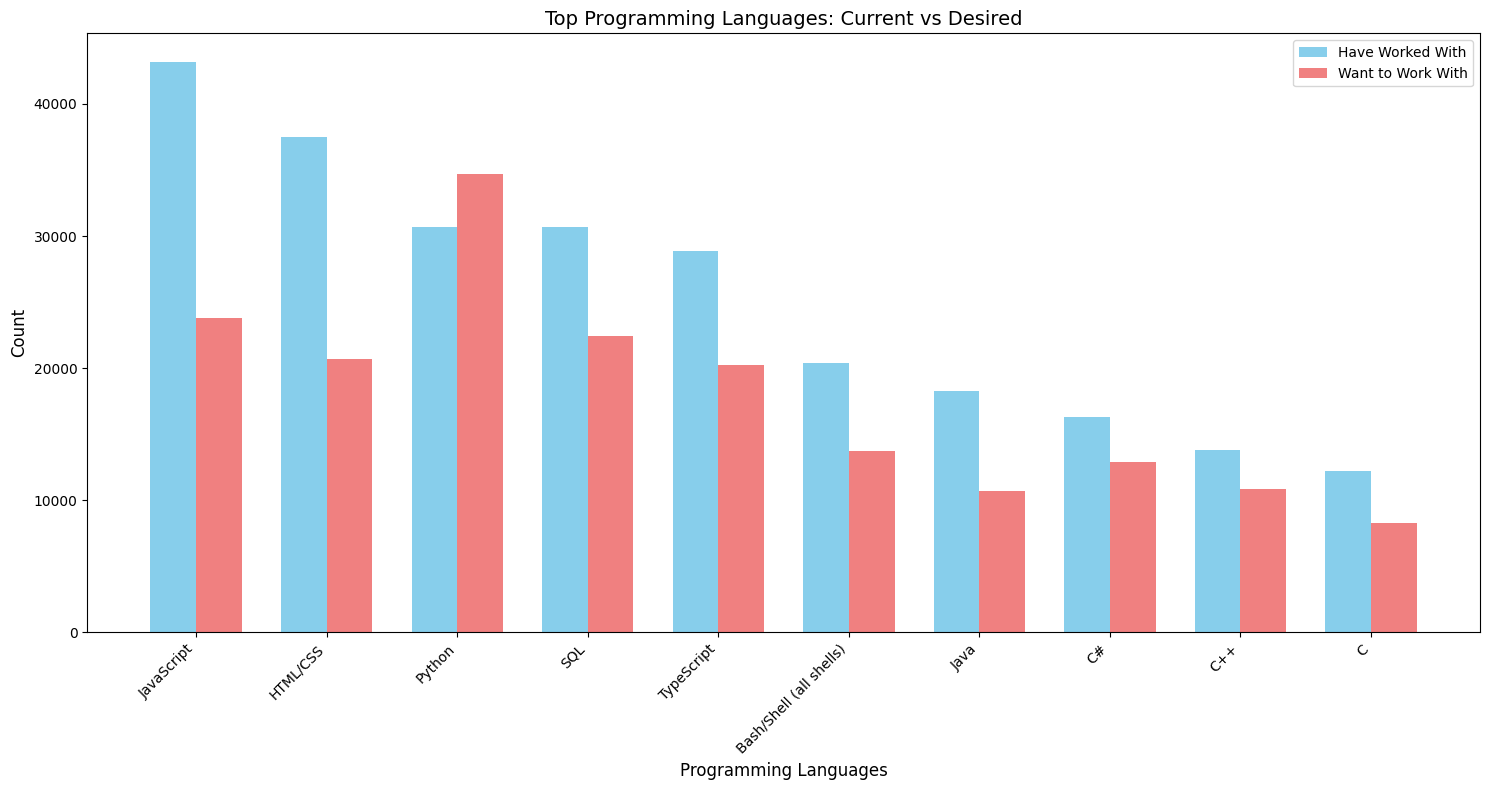

In [32]:
## Write your code here
# Split the semicolon-separated values and create separate rows
have_worked_expanded = df['LanguageHaveWorkedWith'].str.split(';').explode()
want_to_work_expanded = df['LanguageWantToWorkWith'].str.split(';').explode()

# Count frequencies
have_worked_counts = have_worked_expanded.value_counts().reset_index()
have_worked_counts.columns = ['Language', 'HaveWorkedWith']

want_to_work_counts = want_to_work_expanded.value_counts().reset_index()
want_to_work_counts.columns = ['Language', 'WantToWorkWith']

# Merge the two dataframes on Language
language_comparison = pd.merge(have_worked_counts, want_to_work_counts, 
                              on='Language', how='outer').fillna(0)

# Convert to integers as they should be counts
language_comparison['HaveWorkedWith'] = language_comparison['HaveWorkedWith'].astype(int)
language_comparison['WantToWorkWith'] = language_comparison['WantToWorkWith'].astype(int)

# Sort by most used languages
language_comparison = language_comparison.sort_values('HaveWorkedWith', ascending=False)

# Select top 10 languages for better visualization
top_languages = language_comparison.head(10)

plt.figure(figsize=(15, 8))
bar_width = 0.35
x = range(len(top_languages))

plt.bar([i - bar_width/2 for i in x], top_languages['HaveWorkedWith'], 
        width=bar_width, label='Have Worked With', color='skyblue')
plt.bar([i + bar_width/2 for i in x], top_languages['WantToWorkWith'], 
        width=bar_width, label='Want to Work With', color='lightcoral')

plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top Programming Languages: Current vs Desired', fontsize=14)
plt.xticks(x, top_languages['Language'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1400x800 with 0 Axes>

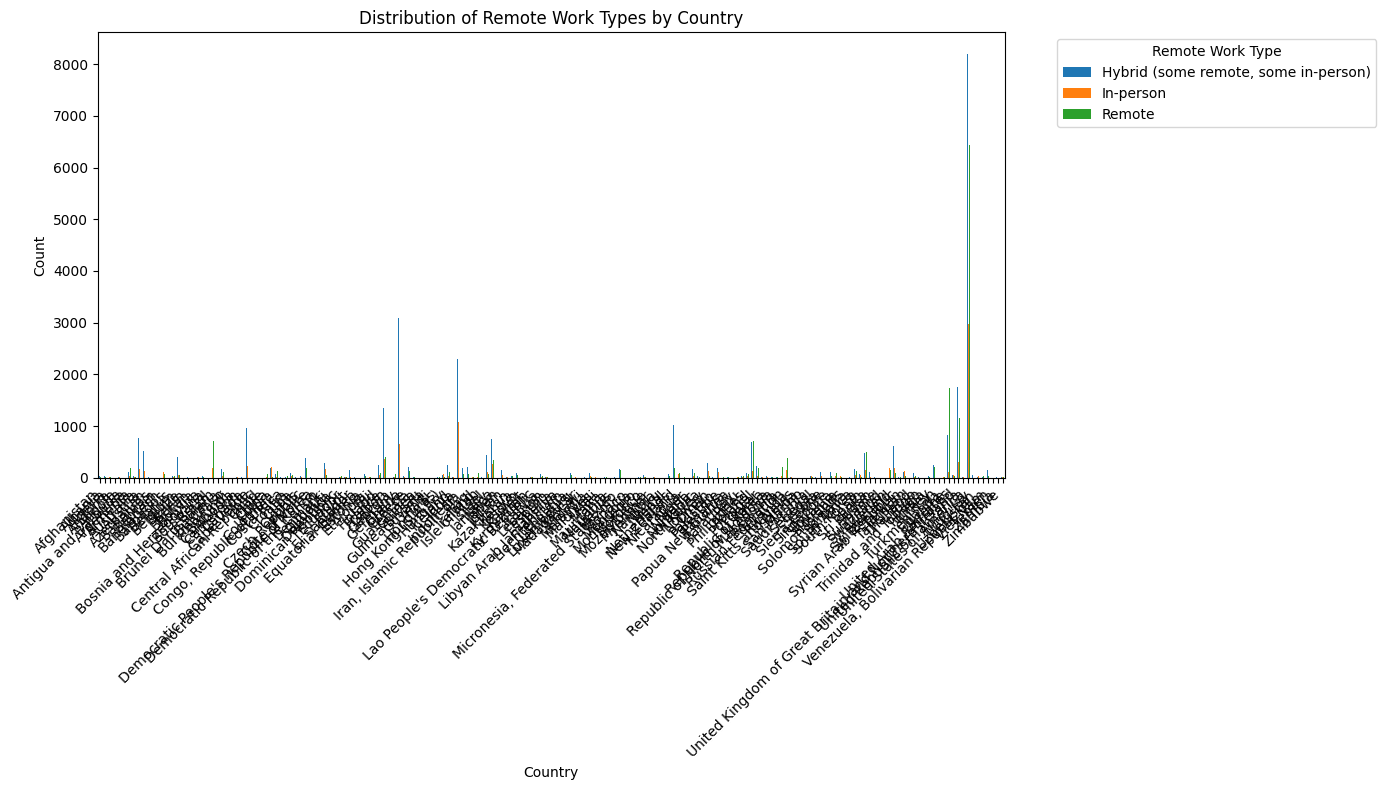

In [36]:
## Write your code here
remote_by_region = pd.crosstab(
    df['Country'], 
    df['RemoteWork']
)

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
remote_by_region.plot(kind='bar', figsize=(14, 8))
plt.title('Distribution of Remote Work Types by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [37]:
## Write your code here
# Convert YearsCodePro to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Calculate Pearson correlation (linear relationship)
pearson_corr = df['YearsCodePro'].corr(df['JobSat'], method='pearson')
print(f"Pearson correlation coefficient: {pearson_corr:.4f}")

# Calculate Spearman correlation (monotonic relationship)
spearman_corr = df['YearsCodePro'].corr(df['JobSat'], method='spearman')
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")

Pearson correlation coefficient: 0.0658
Spearman correlation coefficient: 0.1048


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_299/3768850334.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

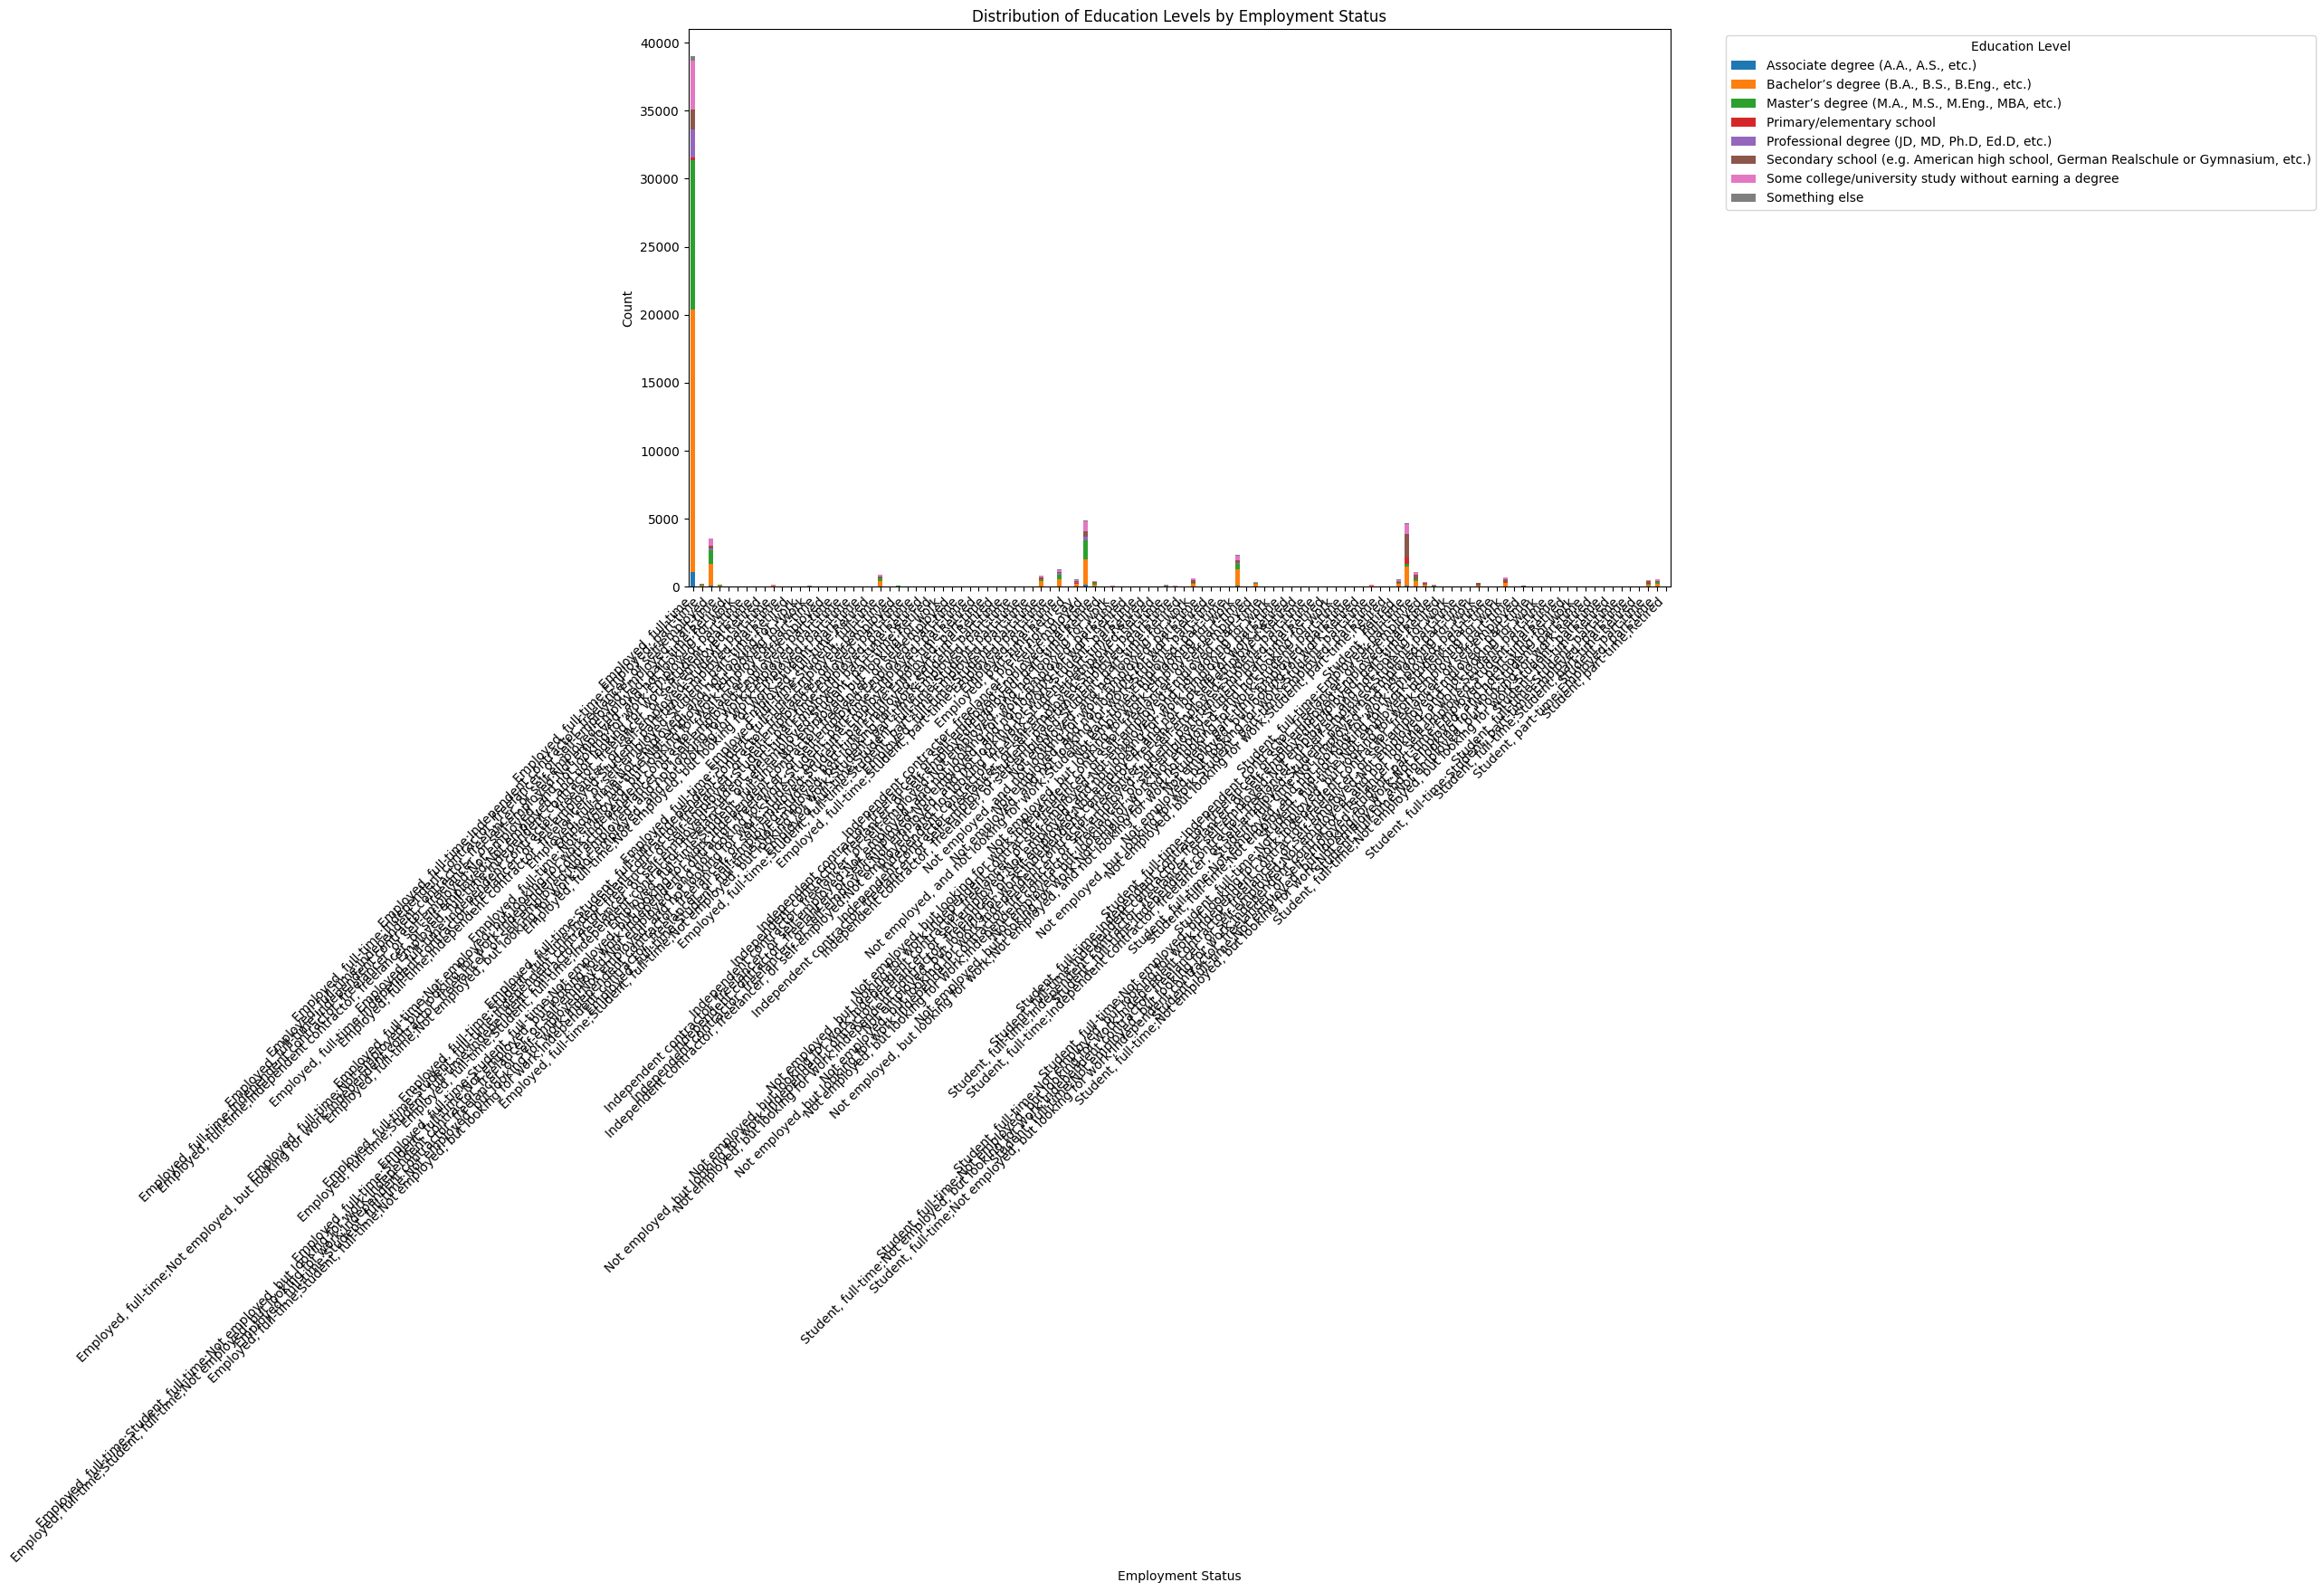

In [39]:
## Write your code here
employment_education = pd.crosstab(
    df['Employment'], 
    df['EdLevel']
)

# Create a stacked bar chart
plt.figure(figsize=(14, 8))
employment_education.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribution of Education Levels by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [40]:
## Write your code here
df.to_csv('cleaned_stack_overflow_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
